In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset using sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Displaying relevant information about the data
print(data['DESCR'][200:1420])

ibutes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===========================

In [2]:
#Separating data into feature variable X and target variable y respectively
X=data['data']
y=data['target']

#Extracting the names of the features from data
features = data['feature_names']

#Splitting X & y into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=50)

#Creating a dataframe of the data, for a visual check
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
df.columns=np.concatenate((features,np.array(['label'])))
print("Shape of data =", df.shape)

#Printing the top 5 rows of the dataframe
df.head()

Shape of data = (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
from sklearn.svm import SVC
clf = SVC(gamma='scale',C=0.1)
#Fitting the predictino model onto the training set
clf.fit(X_train, y_train)

#Checking the model's performance on the test set
print('R2 score for the model on test set =', clf.score(X_test, y_test))

R2 score for the model on test set = 0.9649122807017544


In [4]:
#Importing the module for LimeTabularExplainer
import lime.lime_tabular

#Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=features, 
                    verbose=True, mode='regression')

In [5]:
#Index corresponding to the test vector
i = 5

#Number denoting the top features
k = 5

exp_lime = explainer_lime.explain_instance(X_test[i], clf.predict, num_features=10)
exp_lime.show_in_notebook()
exp_lime.as_list()

Intercept 0.5636166957322502
Prediction_local [1.07341619]
Right: 1


[('worst area <= 514.97', 0.39071485474585743),
 ('mean area <= 419.53', 0.09619343645363705),
 ('worst fractal dimension <= 0.07', -0.033591502342774464),
 ('1.60 < perimeter error <= 2.28', 0.029786421271476328),
 ('smoothness error > 0.01', -0.02686181168069679),
 ('worst symmetry <= 0.25', 0.019205380006380147),
 ('0.12 < worst smoothness <= 0.13', 0.0189814278049392),
 ('0.02 < concavity error <= 0.03', -0.01771254299496692),
 ('0.02 < mean concave points <= 0.03', 0.016718845884760598),
 ('mean perimeter <= 74.97', 0.0163649850288946)]

In [6]:
samples_list = [100, 500, 1000, 5000, 10000, 15000, 20000]
repeated_calls = 10
ans = {}
for val in samples_list:
    ans[val] = []
    print(val)
    for _ in range(repeated_calls):
        exp_lime = explainer_lime.explain_instance(X_test[i], clf.predict, num_features=10, num_samples = val)
        temp_l = []
        for feature in exp_lime.as_list():
            temp_l.append(feature[0])
        print(temp_l)
        ans[val].append(temp_l)

100
Intercept 0.5784057957849489
Prediction_local [0.99092076]
Right: 1
['worst area <= 514.97', 'worst perimeter <= 84.06', 'mean area <= 419.53', '21.29 < worst texture <= 25.46', 'worst radius <= 12.98', '0.12 < worst concavity <= 0.23', '0.12 < worst smoothness <= 0.13', '18.89 < mean texture <= 21.84', '0.83 < texture error <= 1.12', '0.02 < concavity error <= 0.03']
Intercept 0.5378714577077872
Prediction_local [0.84156684]
Right: 1
['worst area <= 514.97', '17.85 < area error <= 24.48', '0.83 < texture error <= 1.12', 'worst symmetry <= 0.25', '0.02 < symmetry error <= 0.02', 'mean area <= 419.53', '21.29 < worst texture <= 25.46', '0.02 < mean concave points <= 0.03', 'mean perimeter <= 74.97', 'mean compactness <= 0.06']
Intercept 0.6137245490663378
Prediction_local [0.87006556]
Right: 1
['worst area <= 514.97', 'compactness error <= 0.01', '0.01 < concave points error <= 0.01', '21.29 < worst texture <= 25.46', '0.02 < concavity error <= 0.03', '0.03 < mean concavity <= 0.06'

Intercept 0.6037508966124441
Prediction_local [0.91954081]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', '0.01 < concave points error <= 0.01', '0.07 < worst concave points <= 0.10', 'mean compactness <= 0.06', '0.12 < worst smoothness <= 0.13', '0.23 < radius error <= 0.33', '18.89 < mean texture <= 21.84', '21.29 < worst texture <= 25.46', 'compactness error <= 0.01']
Intercept 0.5899705458040617
Prediction_local [0.97175009]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', 'mean radius <= 11.69', 'worst compactness <= 0.15', 'compactness error <= 0.01', 'fractal dimension error <= 0.00', '0.23 < radius error <= 0.33', '0.83 < texture error <= 1.12', '0.02 < concavity error <= 0.03', '0.02 < symmetry error <= 0.02']
Intercept 0.5601903966544463
Prediction_local [1.09735006]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', 'mean perimeter <= 74.97', 'mean compactness <= 0.06', '0.12 < worst smoothness <= 0.13', '21.29 < worst texture <= 25.46', 'worst fracta

Intercept 0.566721470078523
Prediction_local [1.01973517]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', 'worst radius <= 12.98', 'fractal dimension error <= 0.00', '1.60 < perimeter error <= 2.28', 'mean symmetry <= 0.16', '17.85 < area error <= 24.48', 'worst symmetry <= 0.25', '0.12 < worst smoothness <= 0.13', '0.07 < worst concave points <= 0.10']
Intercept 0.5743998296049692
Prediction_local [0.99048971]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', 'worst symmetry <= 0.25', 'worst perimeter <= 84.06', '0.01 < concave points error <= 0.01', 'fractal dimension error <= 0.00', 'mean perimeter <= 74.97', '0.03 < mean concavity <= 0.06', '0.12 < worst smoothness <= 0.13', '21.29 < worst texture <= 25.46']
Intercept 0.5337746623342388
Prediction_local [1.08291405]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', '0.12 < worst smoothness <= 0.13', '0.12 < worst concavity <= 0.23', 'mean symmetry <= 0.16', 'worst symmetry <= 0.25', '0.01 < concave points err

Intercept 0.5296702406593858
Prediction_local [1.13446118]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', '1.60 < perimeter error <= 2.28', 'mean fractal dimension <= 0.06', '0.12 < worst concavity <= 0.23', '0.03 < mean concavity <= 0.06', '0.01 < concave points error <= 0.01', 'worst radius <= 12.98', 'fractal dimension error <= 0.00', 'worst symmetry <= 0.25']
Intercept 0.5553356389070434
Prediction_local [1.06462601]
Right: 1
['worst area <= 514.97', 'mean area <= 419.53', 'worst compactness <= 0.15', '0.12 < worst smoothness <= 0.13', 'mean perimeter <= 74.97', 'compactness error <= 0.01', '0.12 < worst concavity <= 0.23', 'worst symmetry <= 0.25', '1.60 < perimeter error <= 2.28', 'fractal dimension error <= 0.00']


In [9]:
def relative_variability(arr):
    ans = []
    for idx in range(1,len(arr)):
        ans.append(10-len(list(set(arr[idx]) & set(arr[0]))))
    return ans

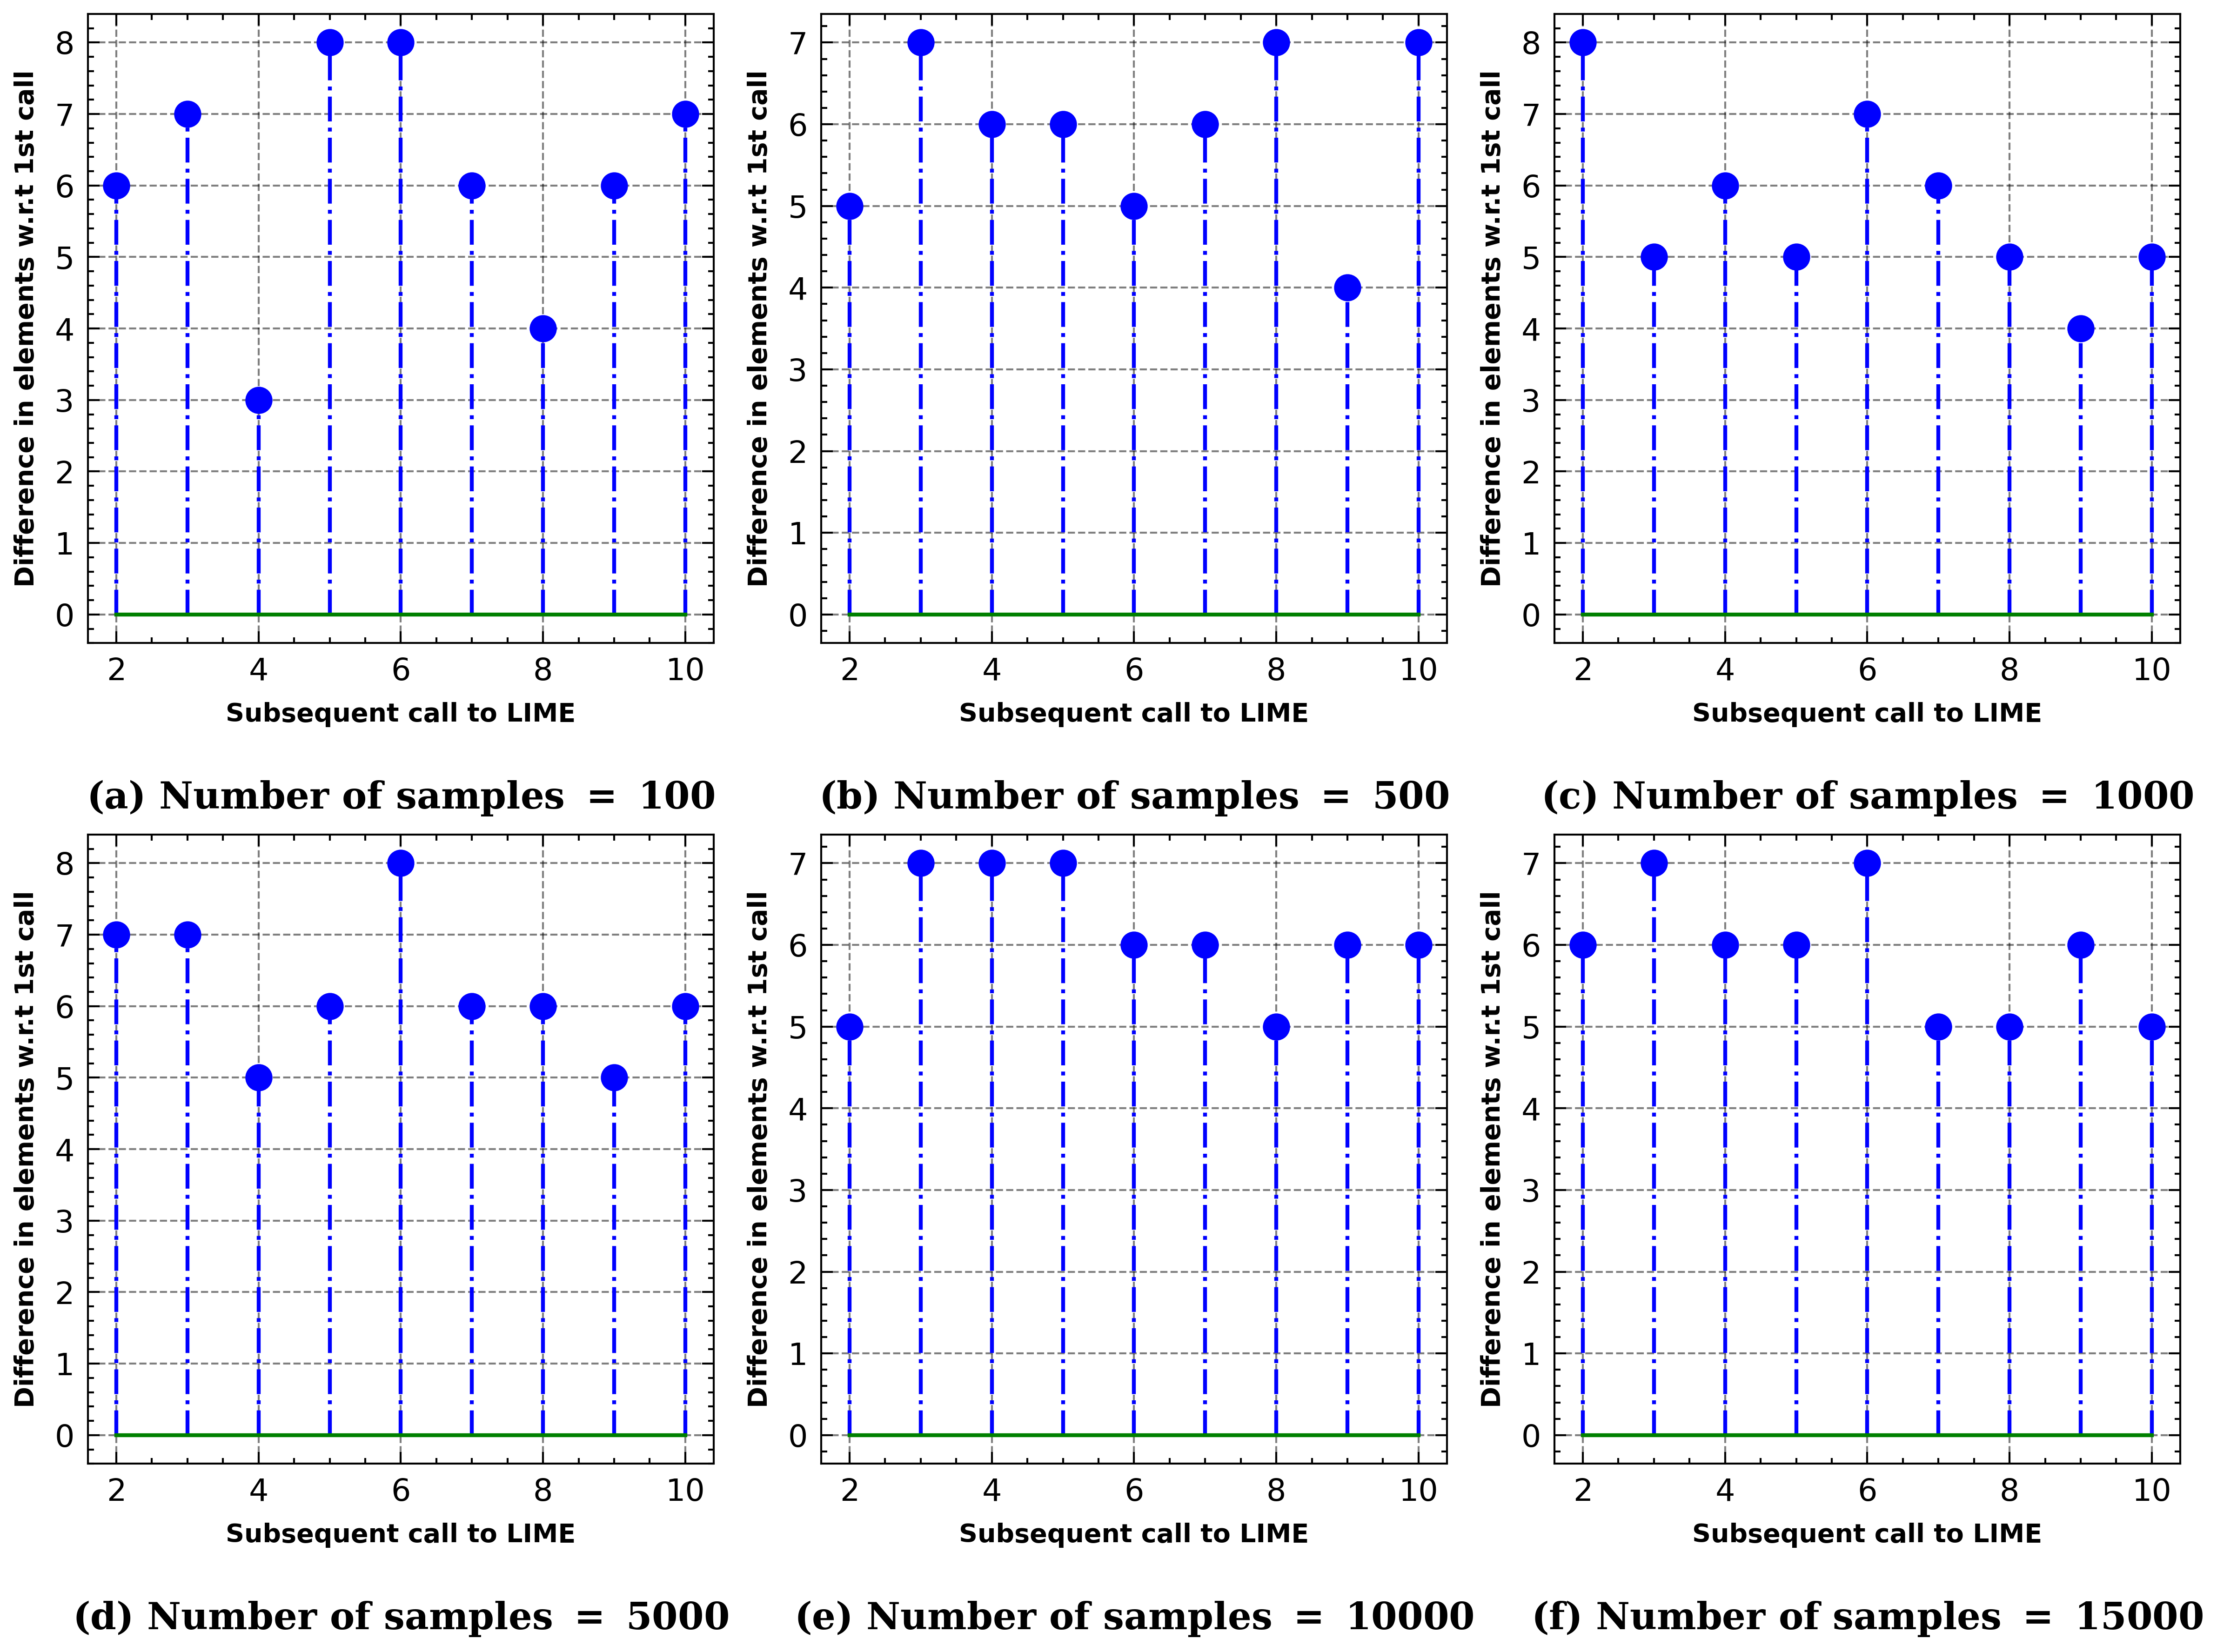

In [39]:
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])
plt.rcParams['savefig.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.rcParams['xtick.labelsize'] = 'medium'

plt.subplot(2,3,1)
plt.stem(range(2,11),relative_variability(ans[100]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(a)\ Number\ of\ samples\ =\ 100}$", y= -0.3)

plt.subplot(2,3,2)
plt.stem(range(2,11),relative_variability(ans[500]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(b)\ Number\ of\ samples\ =\ 500}$", y= -0.3)

plt.subplot(2,3,3)
plt.stem(range(2,11),relative_variability(ans[1000]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(c)\ Number\ of\ samples\ =\ 1000}$", y= -0.3)

plt.subplot(2,3,4)
plt.stem(range(2,11),relative_variability(ans[5000]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(d)\ Number\ of\ samples\ =\ 5000}$", y= -0.3)

plt.subplot(2,3,5)
plt.stem(range(2,11),relative_variability(ans[10000]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(e)\ Number\ of\ samples\ =\ 10000}$", y= -0.3)

plt.subplot(2,3,6)
plt.stem(range(2,11),relative_variability(ans[15000]),linefmt='b-.', markerfmt='bo')
plt.xlabel("Subsequent call to LIME")
plt.ylabel("Difference in elements w.r.t 1st call")
plt.title(r"$\bf{(f)\ Number\ of\ samples\ =\ 15000}$", y= -0.3)
plt.tight_layout()
plt.savefig(f"LIME_Inconsistency.png",dpi=600)

In [38]:
plt.rcParams['ytick.labelsize']

'medium'